# Opplagsverk
Databasediagram: 2 deler Type og Variabel

[Type-diagrammet](https://viewer.diagrams.net/?tags=%7B%7D&highlight=0000ff&edit=_blank&layers=1&nav=1&title=NiN3.0%20ERDiagram_type#Uhttps%3A%2F%2Fdrive.google.com%2Fuc%3Fid%3D1Hx1bMcy3zW6ZlVHqJHPZwPD8MX5akZtx%26export%3Ddownload)

[Variabel-diagrammet](https://viewer.diagrams.net/?tags=%7B%7D&highlight=0000ff&edit=_blank&layers=1&nav=1&title=NIN3.0%20ERDiagram_Variabel.drawio#Uhttps%3A%2F%2Fdrive.google.com%2Fuc%3Fid%3D1WNfl-vzjXFJBpdCK23OiGLlbc-S2yIhP%26export%3Ddownload)

## Apier

[2.3 API](https://nin-kode-api.artsdatabanken.no/swagger/index.html)

3.0 APiER :

[Develop](https://nin3webapi20230627120155.azurewebsites.net/) 

[Test](https://nin3kodeapi.test.artsdatabanken.no)

## Bruk:
Trykk i ønsket kode-blokk og trykk run-knappen, følg så med på statusmelding under kodeboksen.

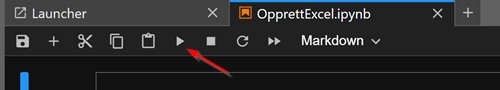

### Hente resultatfiler: 
Bruk filutforskeren til høyre og høyreklikk fil som ønskes nedlastet.
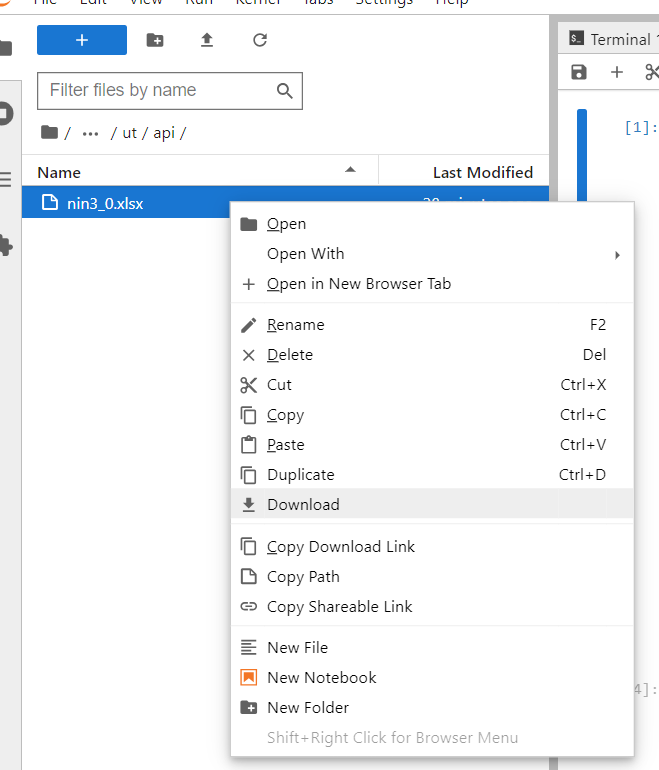


# Excel-fil: Lag Excel av nin3-databasen
* Creates excel-document from downloaded sqlite database


In [ ]:
from spreadsheet_functions import createExcel
createExcel(dbfromlocal=True) #File for editing
createExcel(dbfromlocal=True, forEdit=False) #API file
#createExcel(dbfromlocal=False, branch='master') # choices: develop, test, master 

# Excel-fil: Lag Grunntype-målestokk-variabelnavn -oversikt

In [ ]:
from spreadsheet_functions import createGrunntypeMaalestokkVariabelOversikt
createGrunntypeMaalestokkVariabelOversikt()

## Excel-fil: Trinn under SO og SI -måleskalaer med ant. forekomst

In [ ]:
from spreadsheet_functions import create_so_si_trinn_unihet
create_so_si_trinn_unihet()

## Grunntype-kartleggingsenhet-variabelnavn

In [ ]:
# hm husker ikke hva dette skulle være (10/1) ?#from spreadsheet_functions import 

# Type-fanen

In [ ]:
from spreadsheet_functions import type_fane, getConn,closeConn
display(type_fane(makecsv=True).head(3))
closeConn()

## Hovedtypegruppe-fanen

In [ ]:
#HTG
from spreadsheet_functions import hovedtypegruppe_fane,closeConn
display(hovedtypegruppe_fane(makecsv=True).head(3))
closeConn()

## Hovedtype-fanen

In [ ]:
from spreadsheet_functions import hovedtype_fane,closeConn
display(hovedtype_fane(makecsv=True).head(3))
closeConn()

## Grunntype-fanen

In [ ]:
from spreadsheet_functions import grunntype_fane,closeConn
display(grunntype_fane(makecsv=True).head(3))
closeConn() 

## Kartleggingsenheter M005

In [ ]:
from spreadsheet_functions import kle_m005,closeConn
display(kle_m005(makecsv=True).head(3))
closeConn()

## Kartleggingsenheter M020

In [ ]:
from spreadsheet_functions import kle_m020,closeConn
display(kle_m020(makecsv=True).head(3))
closeConn()

## Kartleggingsenheter M050

In [ ]:
from spreadsheet_functions import kle_m050,closeConn
display(kle_m050(makecsv=True).head(3))
closeConn()

## Hovedtype_KLE_M005

In [ ]:
from spreadsheet_functions import ht_kle_m005,closeConn
display(ht_kle_m005(makecsv=True).head(3))
closeConn()

## Hovedtype_KLE_M020

In [ ]:
from spreadsheet_functions import ht_kle_m020,closeConn
display(ht_kle_m020(makecsv=True).head(3))
closeConn()

## Hovedtype_KLE_M050

In [ ]:
from spreadsheet_functions import ht_kle_m050,closeConn
display(ht_kle_m050(makecsv=True).head(3))
closeConn()

## Grunntype_KLE_M005

In [ ]:
from spreadsheet_functions import gt_kle_m005,closeConn
display(gt_kle_m005(makecsv=True).head(3))
closeConn()

## Grunntype_KLE_M020

In [ ]:
from spreadsheet_functions import gt_kle_m020,closeConn
display(gt_kle_m020(makecsv=True).head(3))
closeConn()

## Grunntype_KLE_M050

In [ ]:
from spreadsheet_functions import gt_kle_m050,closeConn
display(gt_kle_m050(makecsv=True).head(3))
closeConn()

## Hovedtypegruppe_Hovedøkosystem

In [ ]:
from spreadsheet_functions import htg_hoek,closeConn
display(htg_hoek(makecsv=True).head(3))
closeConn()

## Variabel

In [ ]:
from spreadsheet_functions import variabel_fane,closeConn
display(variabel_fane(makecsv=True).head(3))
closeConn()

## Variabelnavn

In [ ]:
from spreadsheet_functions import variabel_fane,closeConn
display(variabel_fane(makecsv=True).head(3))
closeConn()

## Måleskala

In [ ]:
from spreadsheet_functions import maaleskala_fane,closeConn
display(maaleskala_fane(makecsv=True).head(3))
closeConn()

## Trinn

In [ ]:
from spreadsheet_functions import trinn_fane,closeConn
display(trinn_fane(makecsv=True).head(3))
closeConn()

## Variabelnavn_Måleskala

In [ ]:
from spreadsheet_functions import variabelnavn_maaleskala,closeConn  
display(variabelnavn_maaleskala(makecsv=True).head(3))
closeConn()

## Hovedtype_Variabeltrinn

In [ ]:
from spreadsheet_functions import hovedtype_Variabeltrinn,closeConn
display(hovedtype_Variabeltrinn(makecsv=True).head(3))
closeConn()

## Grunntype_Variabeltrinn

In [ ]:
from spreadsheet_functions import grunntype_Variabeltrinn,closeConn
display(grunntype_Variabeltrinn(makecsv=True).head(3))
closeConn()

## Hovedtypegruppe_konvertering

In [ ]:
from spreadsheet_functions import htg_konvertering,closeConn
display(htg_konvertering(makecsv=True).head(3))
closeConn()

## Hovedtype_konvertering

In [ ]:
from spreadsheet_functions import ht_konvertering,closeConn
display(ht_konvertering(makecsv=True).head(3))
closeConn()

## Grunntype_konvertering

In [ ]:
from spreadsheet_functions import gt_konvertering,closeConn
display(gt_konvertering(makecsv=True).head(3))
closeConn()

## Enums

In [ ]:
from spreadsheet_functions import enums,closeConn
display(enums(makecsv=True).head(3))
closeConn()